# Telecom Churn - ML Group Case Study

### Business Problem Overview

    In the telecom industry, customers are able to choose from multiple service providers and actively switch 
    from one operator to another. 
    In this highly competitive market, the telecommunications industry experiences 
    an average of 15-25% annual churn rate. 

    Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, 
    customer retention has now become even more important than customer acquisition.

### 1. Importing Libraries:-

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import scipy.stats as stats
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
import pandas_profiling
%matplotlib inline

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\lenovo\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\lenovo\Anaconda3\lib\runpy.py", line 85, i

### 2. Data Preparation:-

#### Data Understanding:-

    In this project we will analyse customer-level data of a leading telecom firm, build predictive models 
    to identify customers at high risk of churn and identify the main indicators of churn.

    Features of the dataset at a glance:-

    A. There are 226 columns and 0 to 99999 entries in each columns.
    B. There of 179 columns of float64 type , 35 columns of int64 type and 12 columns of object type. 


In [2]:
### Importing data
telecom_data= pd.read_csv("telecom_churn_data.csv")

In [3]:
telecom_data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


### Data Dictionary:-

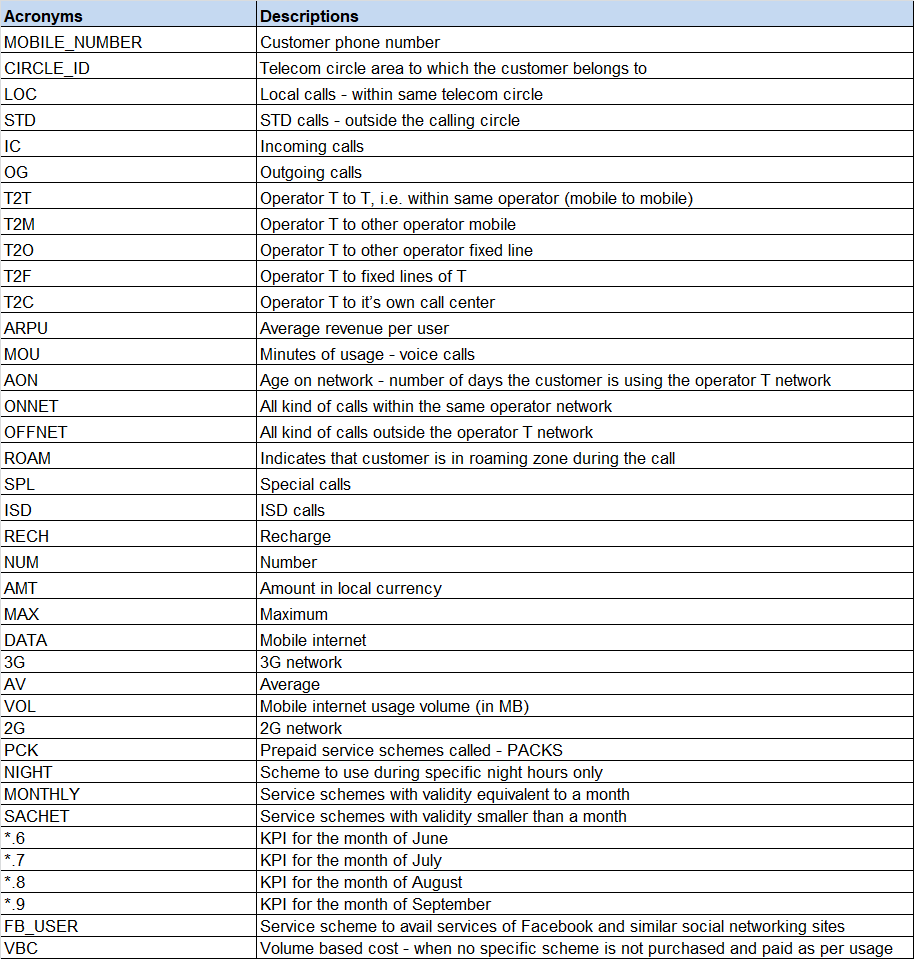

In [4]:
# summarising number of missing values in each column
telecom_data.isnull().sum()

mobile_number               0
circle_id                   0
loc_og_t2o_mou           1018
std_og_t2o_mou           1018
loc_ic_t2o_mou           1018
last_date_of_month_6        0
last_date_of_month_7      601
last_date_of_month_8     1100
last_date_of_month_9     1659
arpu_6                      0
arpu_7                      0
arpu_8                      0
arpu_9                      0
onnet_mou_6              3937
onnet_mou_7              3859
onnet_mou_8              5378
onnet_mou_9              7745
offnet_mou_6             3937
offnet_mou_7             3859
offnet_mou_8             5378
offnet_mou_9             7745
roam_ic_mou_6            3937
roam_ic_mou_7            3859
roam_ic_mou_8            5378
roam_ic_mou_9            7745
roam_og_mou_6            3937
roam_og_mou_7            3859
roam_og_mou_8            5378
roam_og_mou_9            7745
loc_og_t2t_mou_6         3937
                        ...  
arpu_2g_9               74077
night_pck_user_6        74846
night_pck_

In [5]:
# percentage of missing values in each column
round(telecom_data.isnull().sum()/len(telecom_data.index), 2)*100

mobile_number            0.0
circle_id                0.0
loc_og_t2o_mou           1.0
std_og_t2o_mou           1.0
loc_ic_t2o_mou           1.0
last_date_of_month_6     0.0
last_date_of_month_7     1.0
last_date_of_month_8     1.0
last_date_of_month_9     2.0
arpu_6                   0.0
arpu_7                   0.0
arpu_8                   0.0
arpu_9                   0.0
onnet_mou_6              4.0
onnet_mou_7              4.0
onnet_mou_8              5.0
onnet_mou_9              8.0
offnet_mou_6             4.0
offnet_mou_7             4.0
offnet_mou_8             5.0
offnet_mou_9             8.0
roam_ic_mou_6            4.0
roam_ic_mou_7            4.0
roam_ic_mou_8            5.0
roam_ic_mou_9            8.0
roam_og_mou_6            4.0
roam_og_mou_7            4.0
roam_og_mou_8            5.0
roam_og_mou_9            8.0
loc_og_t2t_mou_6         4.0
                        ... 
arpu_2g_9               74.0
night_pck_user_6        75.0
night_pck_user_7        74.0
night_pck_user

let's check whether some rows have a large number of missing values.

In [6]:
# missing values in rows
telecom_data.isnull().sum(axis=1)

0         97
1         20
2         30
3         40
4         30
5         40
6         40
7         69
8         20
9         30
10        49
11        31
12        40
13        30
14        40
15        69
16        40
17        40
18        40
19        10
20        40
21        40
22        40
23        10
24        40
25        40
26        40
27        40
28        30
29        69
        ... 
99969     20
99970     10
99971     40
99972     30
99973     41
99974     40
99975     40
99976     40
99977     40
99978    162
99979     40
99980     10
99981     11
99982     10
99983     99
99984      0
99985     41
99986      0
99987     30
99988     10
99989     40
99990     30
99991     40
99992     40
99993    164
99994     40
99995     40
99996    118
99997      0
99998    120
Length: 99999, dtype: int64

### Filter high-value customers -

    Defination of high-value customers as follows:-
    Those who have recharged with an amount more than or equal to X, where X is the 70th percentile 
    of the average recharge amount in the first two months (the good phase).

#### Note: - High value customer has been filtered from follwing columns -
    
    'total_rech_amt_6' - Total recharge amount (talktime) for the month of 6
    'total_rech_amt_7' - Total recharge amount (talktime) for the month of 7
    
    'total_rech_data_6' - Count of recharge amount (data) for the month of 6
    'total_rech_data_7' - Count of recharge amount (data) for the month of 7
    
    'av_rech_amt_data_6' - Avg. of recharge amount (data) for the month of 6
    'av_rech_amt_data_7' - Avg. of recharge amount (data) for the month of 7

    Total recharge amount per month ==> total_rech_amt_mnth + (total_rech_data_mnth * av_rech_amt_data_mnth )

In [7]:
#replacing null to avoid compulational issue --
telecom_data[['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','total_rech_data_6','total_rech_data_7','total_rech_data_8','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8']] =  telecom_data[['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','total_rech_data_6','total_rech_data_7','total_rech_data_8','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8']].replace(np.nan, 0, regex=True)

In [8]:
## Creating total amount KPI for Data:-

telecom_data['total_rech_amt_data_6'] = telecom_data.apply(lambda x: (x['total_rech_data_6']*x['av_rech_amt_data_6']),axis =1)
telecom_data['total_rech_amt_data_7'] = telecom_data.apply(lambda x: (x['total_rech_data_7']*x['av_rech_amt_data_7']),axis =1)

In [9]:
## Creating average amount KPI for data + talktime:-

telecom_data['avg_rech_amt_6_7'] = telecom_data.apply(lambda x: ((x['total_rech_amt_6']+x['total_rech_amt_7']+x['total_rech_amt_data_6']+x['total_rech_amt_data_7'])/2),axis =1)

#### Decile Analysis:-
    We have to choose customers belonging to 70 percentile and above

In [10]:
telecom_data['avg_rech_amt_6_7'].describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]).T

count    99999.000000
mean       485.328068
std        869.423594
min          0.000000
10%         60.000000
20%        108.500000
30%        155.000000
40%        209.500000
50%        275.000000
60%        360.000000
70%        478.000000
80%        656.500000
90%       1028.000000
max      61236.000000
Name: avg_rech_amt_6_7, dtype: float64

In [11]:
telecom_data['avg_rech_decile'] = pd.qcut(telecom_data['avg_rech_amt_6_7'], 10, labels=False)

In [12]:
##Choosing customers belonging to 70 percentile and above
telecom_data_high_value = telecom_data[telecom_data.avg_rech_decile >= 7 ]

In [13]:
telecom_data_high_value[['mobile_number']].count()

mobile_number    29953
dtype: int64

   We have filtered out **29.9K** high value customers - we will be working on dataset - **telecom_data_high_value**

### Creating Some KPIs


### Frequency

In [14]:
def churnfreqrec(telecom_data_high_value):
    i = 0
    a = np.where(telecom_data_high_value[['date_of_last_rech_6']].isnull(),0,1)
    i = i+a
    b = np.where(telecom_data_high_value[['date_of_last_rech_7']].isnull(),0,1)
    i=i+b
    c = np.where(telecom_data_high_value[['date_of_last_rech_8']].isnull(),0,1)
    i=i+c
    return i

In [15]:
telecom_data_high_value['Frequency_recharge'] = 0
telecom_data_high_value['Frequency_recharge'] = telecom_data_high_value.apply(churnfreqrec, axis=1)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Recency

#### Working with date variables

In [16]:
for variable in telecom_data_high_value.columns:
    if telecom_data_high_value[variable].dtype.name in ['object']:
        print (variable)

last_date_of_month_6
last_date_of_month_7
last_date_of_month_8
last_date_of_month_9
date_of_last_rech_6
date_of_last_rech_7
date_of_last_rech_8
date_of_last_rech_9
date_of_last_rech_data_6
date_of_last_rech_data_7
date_of_last_rech_data_8
date_of_last_rech_data_9


In [17]:
## Reference data columns (refernce dates for last date of the month)
## instead of replacing the nan columns we are hardcoding the columns with the date of the last day of the month
telecom_data_high_value['last_date_of_month_6'] = pd.to_datetime('6/30/2014', format='%m/%d/%Y')
telecom_data_high_value['last_date_of_month_7'] = pd.to_datetime('7/31/2014', format='%m/%d/%Y')
telecom_data_high_value['last_date_of_month_8'] = pd.to_datetime('8/31/2014', format='%m/%d/%Y')
telecom_data_high_value['last_date_of_month_9'] = pd.to_datetime('9/30/2014', format='%m/%d/%Y')

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [18]:
## making the column pattern uniform
telecom_data_high_value[['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']] = telecom_data_high_value[['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']].replace('-', '/', regex=True)

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [19]:
## converting the date columns to date format
telecom_data_high_value['date_of_last_rech_6'] = pd.to_datetime(telecom_data_high_value['date_of_last_rech_6'], format='%m/%d/%Y')
telecom_data_high_value['date_of_last_rech_7'] = pd.to_datetime(telecom_data_high_value['date_of_last_rech_7'], format='%m/%d/%Y')
telecom_data_high_value['date_of_last_rech_8'] = pd.to_datetime(telecom_data_high_value['date_of_last_rech_8'], format='%m/%d/%Y')
telecom_data_high_value['date_of_last_rech_9'] = pd.to_datetime(telecom_data_high_value['date_of_last_rech_9'], format='%m/%d/%Y')
telecom_data_high_value['date_of_last_rech_data_6'] = pd.to_datetime(telecom_data_high_value['date_of_last_rech_data_6'], format='%m/%d/%Y')
telecom_data_high_value['date_of_last_rech_data_7'] = pd.to_datetime(telecom_data_high_value['date_of_last_rech_data_7'], format='%m/%d/%Y')
telecom_data_high_value['date_of_last_rech_data_8'] = pd.to_datetime(telecom_data_high_value['date_of_last_rech_data_8'], format='%m/%d/%Y')
telecom_data_high_value['date_of_last_rech_data_9'] = pd.to_datetime(telecom_data_high_value['date_of_last_rech_data_9'], format='%m/%d/%Y')

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

#### Recency of last Recharge

In [20]:
def churnrec(telecom_data_high_value):
    k=True
    a = np.where(telecom_data_high_value[['date_of_last_rech_9']].isnull(),0,1)
    b = np.where(telecom_data_high_value[['date_of_last_rech_8']].isnull(),0,1)
    c = np.where(telecom_data_high_value[['date_of_last_rech_7']].isnull(),0,1)
    d = np.where(telecom_data_high_value[['date_of_last_rech_6']].isnull(),0,1)
    while True:
        if a == 1:
            no_of_Days = (telecom_data_high_value['last_date_of_month_9']  - telecom_data_high_value['date_of_last_rech_9'])
            break
        elif b == 1:
            no_of_Days = (telecom_data_high_value['last_date_of_month_9']  - telecom_data_high_value['date_of_last_rech_8'])
            break
        elif c == 1:
            no_of_Days = (telecom_data_high_value['last_date_of_month_9']  - telecom_data_high_value['date_of_last_rech_7'])
            break
        elif d == 1:
            no_of_Days = (telecom_data_high_value['last_date_of_month_9']  - telecom_data_high_value['date_of_last_rech_6'])
            break
    return no_of_Days

In [21]:
telecom_data_high_value['Recency_last_recharge'] = telecom_data_high_value.apply(churnrec, axis=1)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


**Lets observer some trends**

In [22]:
# extracting month and year from issue_date
telecom_data_high_value['date_of_last_rech_6_month'] = telecom_data_high_value['date_of_last_rech_6'].apply(lambda x: x.month)
telecom_data_high_value['date_of_last_rech_7_month'] = telecom_data_high_value['date_of_last_rech_7'].apply(lambda x: x.month)
telecom_data_high_value['date_of_last_rech_8_month'] = telecom_data_high_value['date_of_last_rech_8'].apply(lambda x: x.month)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [23]:
# let's first observe the number of mean revenue across month
print(telecom_data_high_value.groupby('date_of_last_rech_6_month').arpu_6.mean().round(2))
print(telecom_data_high_value.groupby('date_of_last_rech_7_month').arpu_7.mean().round(2))
print(telecom_data_high_value.groupby('date_of_last_rech_8_month').arpu_8.mean().round(2))

date_of_last_rech_6_month
6.0    559.8
Name: arpu_6, dtype: float64
date_of_last_rech_7_month
7.0    562.04
Name: arpu_7, dtype: float64
date_of_last_rech_8_month
8.0    516.59
Name: arpu_8, dtype: float64


In [24]:
# let's first observe the number of mean outgoing calls across month
print(telecom_data_high_value.groupby('date_of_last_rech_6_month').loc_og_mou_6.mean().round(2))
print(telecom_data_high_value.groupby('date_of_last_rech_7_month').loc_og_mou_7.mean().round(2))
print(telecom_data_high_value.groupby('date_of_last_rech_8_month').loc_og_mou_8.mean().round(2))

date_of_last_rech_6_month
6.0    259.01
Name: loc_og_mou_6, dtype: float64
date_of_last_rech_7_month
7.0    259.85
Name: loc_og_mou_7, dtype: float64
date_of_last_rech_8_month
8.0    246.17
Name: loc_og_mou_8, dtype: float64


In [25]:
# let's first observe the number of mean incoming calls across month
print(telecom_data_high_value.groupby('date_of_last_rech_6_month').total_ic_mou_6.mean().round(2))
print(telecom_data_high_value.groupby('date_of_last_rech_7_month').total_ic_mou_7.mean().round(2))
print(telecom_data_high_value.groupby('date_of_last_rech_8_month').total_ic_mou_8.mean().round(2))

date_of_last_rech_6_month
6.0    290.78
Name: total_ic_mou_6, dtype: float64
date_of_last_rech_7_month
7.0    297.72
Name: total_ic_mou_7, dtype: float64
date_of_last_rech_8_month
8.0    284.2
Name: total_ic_mou_8, dtype: float64


In [26]:
# let's first observe the number of mean recharge amount across month
print(telecom_data_high_value.groupby('date_of_last_rech_6_month').total_rech_amt_6.mean().round(2))
print(telecom_data_high_value.groupby('date_of_last_rech_7_month').total_rech_amt_7.mean().round(2))
print(telecom_data_high_value.groupby('date_of_last_rech_8_month').total_rech_amt_8.mean().round(2))

date_of_last_rech_6_month
6.0    662.74
Name: total_rech_amt_6, dtype: float64
date_of_last_rech_7_month
7.0    663.1
Name: total_rech_amt_7, dtype: float64
date_of_last_rech_8_month
8.0    596.3
Name: total_rech_amt_8, dtype: float64


We see in all the trends there is a decline in the mean value from first two months to third month

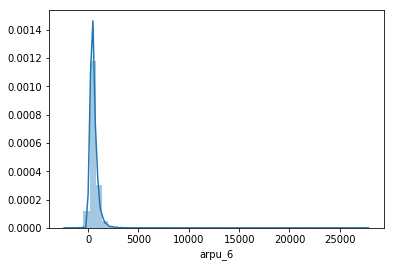

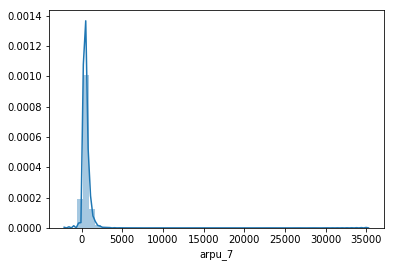

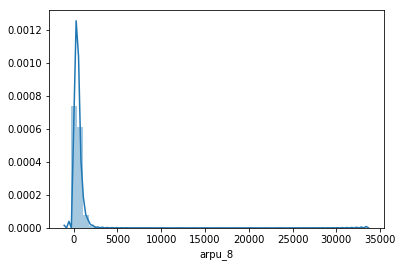

In [27]:
sns.distplot(telecom_data_high_value['arpu_6'])
plt.show()
sns.distplot(telecom_data_high_value['arpu_7'])
plt.show()
sns.distplot(telecom_data_high_value['arpu_8'])
plt.show()

**Dropping unnecessary columns**

In [28]:
##Dropping av_rech_amt_data_mnth column since we already have created KPI for total.
##Dropping decile column since it is no longer necessary

telecom_data_high_value.drop(['av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'avg_rech_decile'], axis=1, inplace= True)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


**Dropping columns with single vlaue diversity**
    
    circle_id        - single value '109'
    
**Replacing NULL value with '1':-**
    
    Categorical levels:-
    loc_og_t2o_mou, std_og_t2o_mou, loc_ic_t2o_mou
    
    '0' - signifies have done some calls per user (loc/std/mou).
    '1' - signifies have done none. (28 customers no loc_og or std_og or loc_ic).

In [29]:
telecom_data_high_value[['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou']].nunique()

circle_id         1
loc_og_t2o_mou    1
std_og_t2o_mou    1
loc_ic_t2o_mou    1
dtype: int64

In [30]:
telecom_data_high_value[['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou']].isnull().any()

circle_id         False
loc_og_t2o_mou     True
std_og_t2o_mou     True
loc_ic_t2o_mou     True
dtype: bool

In [31]:
## Dropping circle id
telecom_data_high_value.drop( 'circle_id', axis=1, inplace= True)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [32]:
##replacing null in 'loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou'

telecom_data_high_value[['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou']] = telecom_data_high_value[['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou']].replace(np.nan, 1, regex=True)

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


#### Creating CHURN INDICATOR -

In [33]:
def churnind(telecom_data_high_value):
    if ((telecom_data_high_value.total_ic_mou_9 == 0) & (telecom_data_high_value.total_og_mou_9 == 0) & (telecom_data_high_value.vol_2g_mb_9 == 0) & (telecom_data_high_value.vol_3g_mb_9 == 0)):
        return 1
    else:
        return 0

In [34]:
telecom_data_high_value['CHURN_IND'] = telecom_data_high_value.apply(churnind, axis=1)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [35]:
#Churn indicator split
telecom_data_high_value.groupby('CHURN_IND').size()

CHURN_IND
0    27520
1     2433
dtype: int64

In [36]:
telecom_tobedel = telecom_data_high_value.filter(regex='_9')
telecom_tobedel.columns

Index(['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9',
       'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9',
       'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9',
       'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9',
       'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9',
       'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9',
       'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9',
       'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9',
       'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9',
       'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9',
       'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9',
       'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9',
       'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9',
       'night_pck_user

In [110]:
telecom_data_new  = telecom_data_high_value.drop(telecom_tobedel.columns, axis=1)

In [111]:
### Deleting Date columns since we have already generated the required KPI

In [112]:
### Drop date variables since we have already used it to create recency and frequency -
telecom_data_new.drop(['last_date_of_month_6',
'last_date_of_month_7',
'last_date_of_month_8',
'date_of_last_rech_6',
'date_of_last_rech_7',
'date_of_last_rech_8',
'date_of_last_rech_data_6',
'date_of_last_rech_data_7',
'date_of_last_rech_data_8',
'date_of_last_rech_6_month',
'date_of_last_rech_8_month',
'date_of_last_rech_7_month'],axis=1, inplace = True)

In [113]:
telecom_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Columns: 165 entries, mobile_number to CHURN_IND
dtypes: float64(136), int32(1), int64(27), timedelta64[ns](1)
memory usage: 37.8 MB


    We now have reduced the varaibles to 165 -
        Next, we will segregate the numeric and categoric variables and make the system robust

**Creating seperate List for categorical and numeric variables**

In [114]:
#Converting telecom_data_new column to integer type

In [115]:
telecom_data_new['Recency_last_recharge'] = telecom_data_new['Recency_last_recharge'].astype('str')

In [116]:
telecom_data_new['Recency_last_recharge'] = telecom_data_new['Recency_last_recharge'].apply(lambda x: pd.to_numeric(x.split(" ")[0]))

In [117]:
telecom_data_new['Recency_last_recharge'].dtype

dtype('int64')

In [118]:
telecom_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Columns: 165 entries, mobile_number to CHURN_IND
dtypes: float64(136), int32(1), int64(28)
memory usage: 37.8 MB


In [119]:
cat_list = ['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'night_pck_user_6', 'night_pck_user_7','night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8','CHURN_IND']
cat_list

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'CHURN_IND']

In [120]:
numlist = []
for x in telecom_data_new.columns:
    if x not in(cat_list):
        numlist.append(x)
numlist

['mobile_number',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 '

**Working with Numerical variables**

In [121]:
#Creating a dataset out of the SUM of NULLs
no_of_null = pd.DataFrame(telecom_data_new[numlist].isnull().sum(axis=0)).reset_index()
no_of_null.rename(columns={ no_of_null.columns[0]: "Attributes",no_of_null.columns[1]: "NoOfNulls"},inplace=True)

In [122]:
#Taking columns where > 0.7 percentile rows are NA:-
no_of_null[no_of_null['NoOfNulls'] > 0].head()

,Attributes,NoOfNulls
4,onnet_mou_6,542
5,onnet_mou_7,536
6,onnet_mou_8,1172
7,offnet_mou_6,542
8,offnet_mou_7,536


In [123]:
## Replacing Numeric 'NaN' values as ZEROs

In [124]:
telecom_data_new[numlist] = telecom_data_new[numlist].replace(np.nan, 0, regex=True)

In [125]:
telecom_data_new[numlist].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Columns: 155 entries, mobile_number to Recency_last_recharge
dtypes: float64(127), int32(1), int64(27)
memory usage: 35.5 MB


In [126]:
#Handling Outliers - Numeric variables
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.90))
    x = x.clip_lower(x.quantile(0.01))
    return x

In [127]:
telecom_data_new[numlist]=telecom_data_new[numlist].apply(lambda x: outlier_capping(x))

**Working with categorical varaibles**

In [128]:
telecom_data_new[cat_list].head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,CHURN_IND
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1
7,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1
8,0.0,0.0,0.0,NaN,0.0,0.0,NaN,1.0,1.0,0
21,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0
23,0.0,0.0,0.0,NaN,0.0,0.0,NaN,1.0,1.0,0


In [129]:
telecom_data_new[cat_list].isnull().any()

loc_og_t2o_mou      False
std_og_t2o_mou      False
loc_ic_t2o_mou      False
night_pck_user_6     True
night_pck_user_7     True
night_pck_user_8     True
fb_user_6            True
fb_user_7            True
fb_user_8            True
CHURN_IND           False
dtype: bool

In [130]:
list_to_replace = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']

In [131]:
#missing values can be imputed with '-1' where -1 can be treated as a new category. 
telecom_data_new[list_to_replace] = telecom_data_new[list_to_replace].replace(np.nan, -1, regex=True)

In [132]:
#any categorical variables in float format needs to be converted to int format
telecom_data_new[cat_list] = telecom_data_new[cat_list].astype('int')

    There are multiple columns which have only single value type - we can drop them.

In [133]:
singlelist=[]
for x in telecom_data_new.columns:
    if (telecom_data_new[x].nunique() == 1):
        singlelist.append(x)

print (singlelist)

['std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'og_others_7', 'og_others_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'spl_ic_mou_7', 'spl_ic_mou_8', 'sachet_3g_8']


In [134]:
telecom_data_new.drop(singlelist,axis=1, inplace=True)

In [135]:
for x in cat_list:
    print(x)
    print(telecom_data_new[x].unique())

loc_og_t2o_mou
[0 1]
std_og_t2o_mou
[0 1]
loc_ic_t2o_mou
[0 1]
night_pck_user_6
[ 0 -1  1]
night_pck_user_7
[ 0 -1  1]
night_pck_user_8
[ 0 -1  1]
fb_user_6
[ 1 -1  0]
fb_user_7
[ 1 -1  0]
fb_user_8
[ 1 -1  0]
CHURN_IND
[1 0]


In [136]:
telecom_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Columns: 151 entries, mobile_number to CHURN_IND
dtypes: float64(141), int32(10)
memory usage: 33.6 MB


In [60]:
to = telecom_data_new.groupby(['fb_user_6', 'CHURN_IND']).agg({'mobile_number': 'sum'})
# Change: groupby state_office and divide by sum
to_pcts = to.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
print (to_pcts)
pct0 = to_pcts.mobile_number[(to_pcts.CHURN_IND==1) & (to_pcts.fb_user_6 == 0)].round(1)
pct1 = to_pcts.mobile_number[(to_pcts.CHURN_IND==1) & (to_pcts.fb_user_6 == 1)].round(1)
pctminus1 = to_pcts.mobile_number[(to_pcts.CHURN_IND==1) & (to_pcts.fb_user_6 == -1)].round(1)
print(pct0)
print (pct1)
print (pctminus1)

   fb_user_6  CHURN_IND  mobile_number
0         -1          0      90.153117
1         -1          1       9.846883
2          0          0      92.270526
3          0          1       7.729474
4          1          0      93.314124
5          1          1       6.685876
3    7.7
Name: mobile_number, dtype: float64
5    6.7
Name: mobile_number, dtype: float64
1    9.8
Name: mobile_number, dtype: float64


In [61]:
PCA

NameError: name 'PCA' is not defined